In [1]:
import tifffile as ti
import os
import matplotlib.pyplot as plt
from skimage.exposure import equalize_adapthist, equalize_hist, rescale_intensity
import numpy as np
import matplotlib

matplotlib.rcParams['figure.figsize'] = [25, 25]

(2, 1192, 1192)


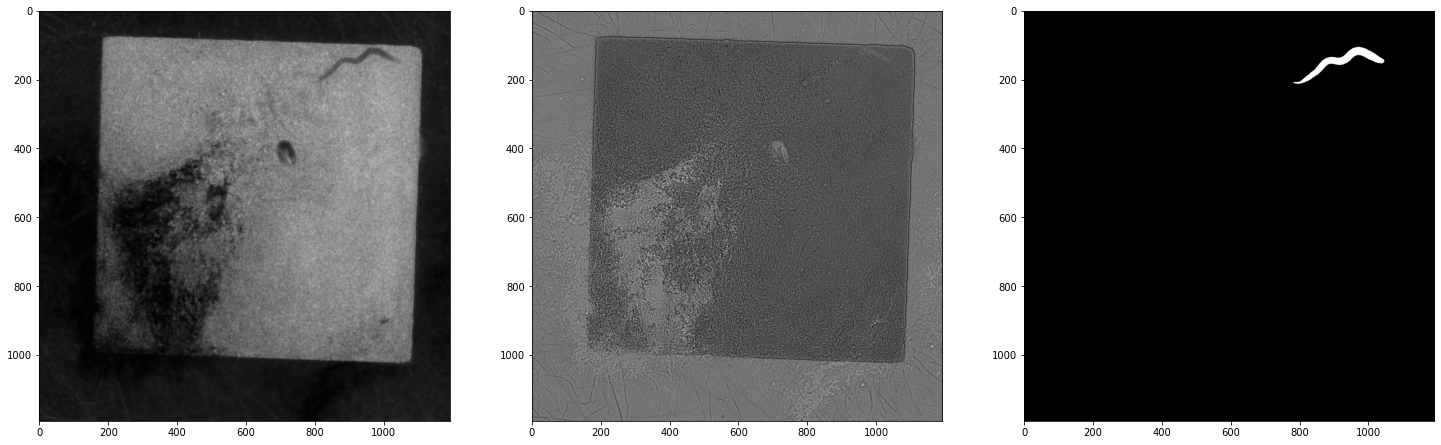

In [2]:
img_dir = "/mnt/external.data/TowbinLab/spsalmon/shallow_chambers_database/training_set/raw/"
mask_dir = "/mnt/external.data/TowbinLab/spsalmon/shallow_chambers_database/training_set/body_seg/"

# img_name = "Time00136_Point0154_Channel440 nm,575,DIA_Seq31706.tiff"
img_name = sorted(os.listdir(img_dir))[115]
mask_name = "seg_" + img_name
img = ti.imread(img_dir + img_name)
mask = ti.imread(mask_dir + mask_name)

bact = img[0, :, :]
tl = img[1, :, :]

improved_img = np.empty_like(img, dtype="float64")
print(improved_img.shape)

fig = plt.figure()
ax1, ax2, ax3 = fig.subplots(1, 3)

ax1.imshow(bact, cmap="gray")

ax2.imshow(tl, cmap = "gray")

ax3.imshow(mask, cmap = "gray")
plt.show()

## BACTERIA

In [3]:
# improved_bact = equalize_hist(bact, nbins = np.max(bact) - 1)
# # # improved_bact = equalize_adapthist(bact, nbins = 512)
# # improved_bact = equalize_adapthist(bact)
# # improved_bact_normalized = equalize_adapthist(normalized_bact)
# # improved_bact_rescaled = equalize_adapthist(rescaled_bact)

# fig = plt.figure()
# ax1, ax2 = fig.subplots(1, 2)

# ax1.imshow(bact, cmap="gray")
# # plt.show()

# ax2.imshow(improved_bact, cmap = "gray")
# plt.show()

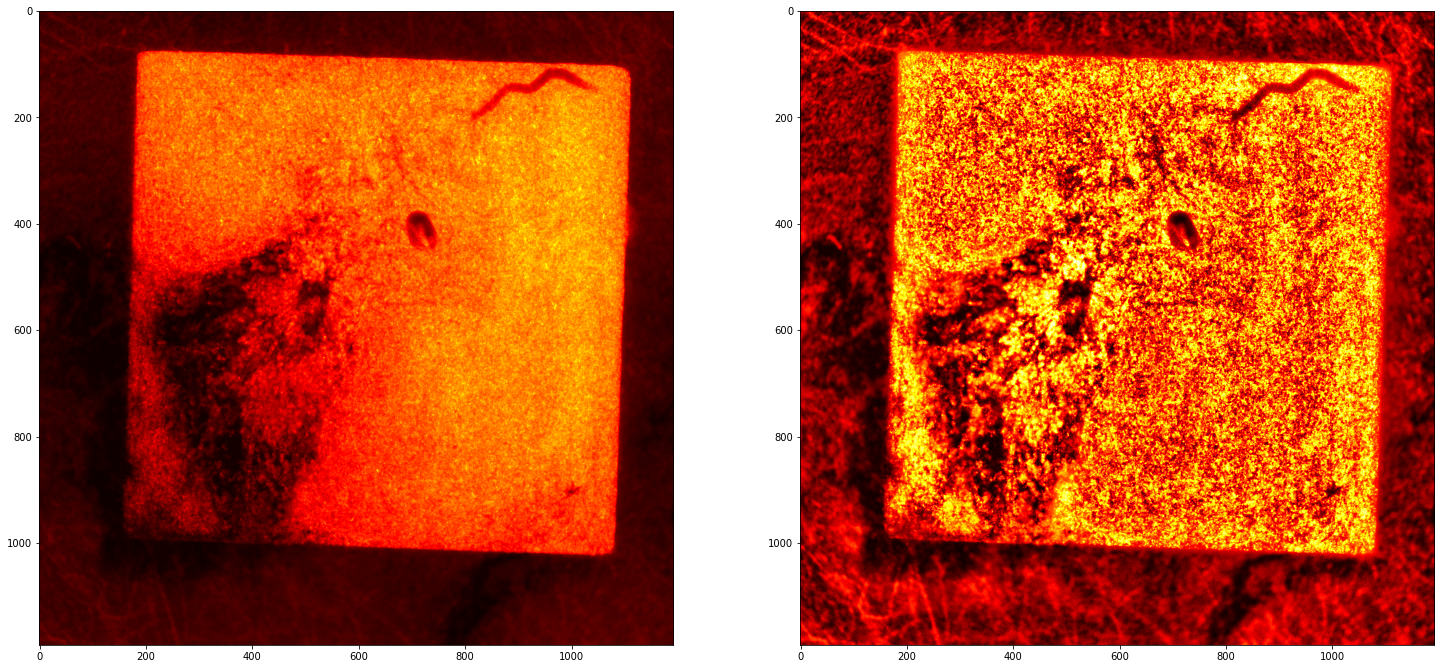

In [4]:
improved_bact = equalize_adapthist(bact, nbins = np.max(bact) - 1, clip_limit=0.0005, kernel_size=int(tl.shape[0]/16))
# # improved_bact = equalize_adapthist(bact, nbins = 512)
# improved_bact = equalize_adapthist(bact)
# improved_bact_normalized = equalize_adapthist(normalized_bact)
# improved_bact_rescaled = equalize_adapthist(rescaled_bact)

fig = plt.figure()
ax1, ax2 = fig.subplots(1, 2)

ax1.imshow(bact, cmap="hot")
# plt.show()

ax2.imshow(improved_bact, cmap = "hot")
plt.show()

## TL

In [5]:
# improved_tl = equalize_hist(tl, nbins = np.max(tl) - 1)
# # # improved_bact = equalize_adapthist(bact, nbins = 512)
# # improved_bact = equalize_adapthist(bact)
# # improved_bact_normalized = equalize_adapthist(normalized_bact)
# # improved_bact_rescaled = equalize_adapthist(rescaled_bact)

# fig = plt.figure()
# ax1, ax2 = fig.subplots(1, 2)

# ax1.imshow(tl, cmap="gray")
# # plt.show()

# ax2.imshow(improved_tl, cmap = "gray")
# plt.show()

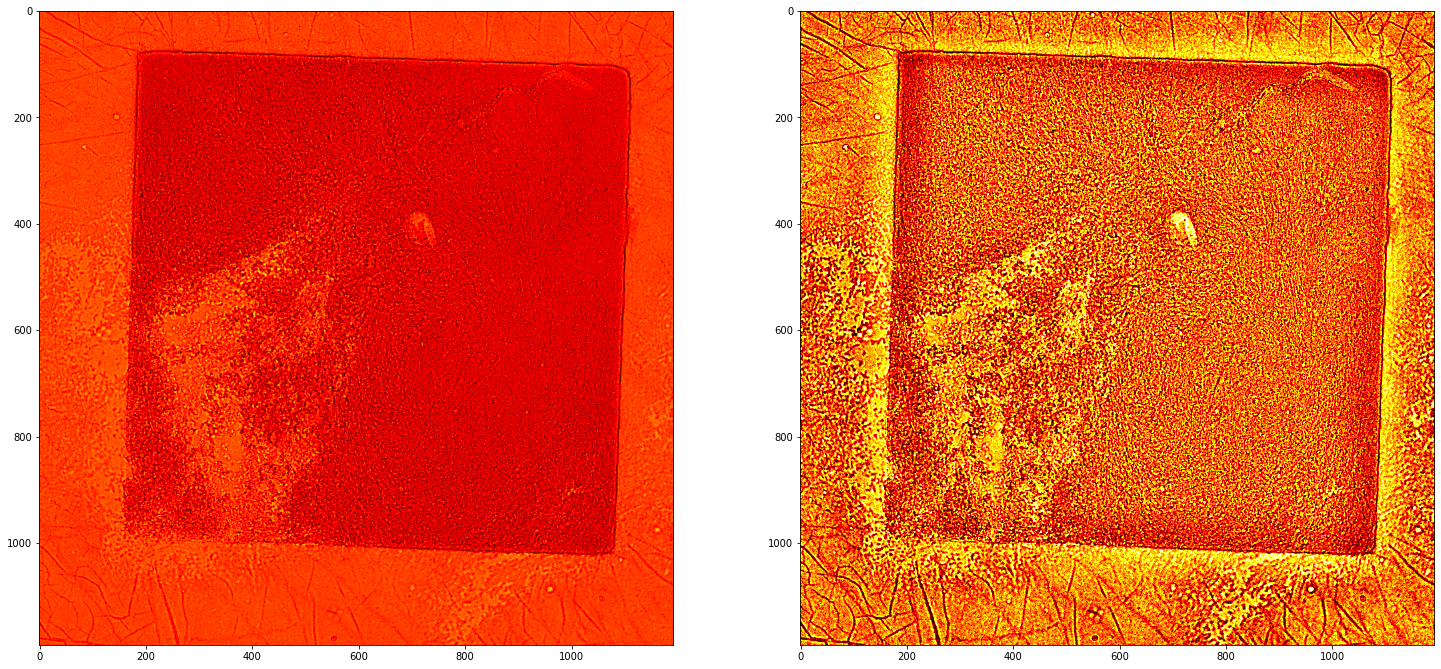

In [6]:
improved_img[1, :, :] = equalize_adapthist(img[1, :, :], nbins = np.max(img[1, :, :]) - 1, clip_limit=0.005, kernel_size=int(tl.shape[0]/16))
# # improved_bact = equalize_adapthist(bact, nbins = 512)
# improved_bact = equalize_adapthist(bact)
# improved_bact_normalized = equalize_adapthist(normalized_bact)
# improved_bact_rescaled = equalize_adapthist(rescaled_bact)

fig = plt.figure()
ax1, ax2 = fig.subplots(1, 2)

ax1.imshow(tl, cmap="hot")
# plt.show()

ax2.imshow(improved_img[1, :, :], cmap = "hot")
plt.show()